# Copyright

<PRE>
Jelen Jupyter notebook a Budapesti Műszaki és Gazdaságtudományi Egyetemen tartott "Deep Learning a gyakorlatban Python és LUA alapon" tantárgy segédanyagaként készült. 
A tantárgy honlapja: http://smartlab.tmit.bme.hu/oktatas-deep-learning
Deep Learning kutatás: http://smartlab.tmit.bme.hu/deep-learning

A notebook bármely részének újra felhasználása, publikálása csak a szerzők írásos beleegyezése esetén megegengedett.

2020 (c) Gyires-Tóth Bálint (toth.b kukac tmit pont bme pont hu), Zainkó Csaba (zainko kukac tmit pont bme pont hu)
</PRE>

# MNIST adatbázis tanítása MLP-vel

Először hozzuk létre a hálózatot:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import HeNormal

nb_classes = 10
model = Sequential()
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal(), input_shape=(784,)))
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

Ezt követően töltsük be az MNIST adatbázist:

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
# int8 formába van, lebegőpontos kell
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# a kimenetet onehot kódolásúvá alakítjuk
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(np.asarray(range(nb_classes)))
print(Y_train[0].astype(np.int))


(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)
[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 0 0 0 0]


Majd tanítsuk be a modellünket. Most nem határoztunk meg külön validációs adatbázist, hanem a model.fit függvény validation_split paramétereként adjuk meg, hogy hány százalékot használjon fel validációs célokra a tanítás:

In [7]:
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir='logs', histogram_freq=1, write_graph=1)

In [8]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=30, verbose=1, validation_split=0.2, callbacks=[tb])

Epoch 1/30
  1/375 [..............................] - ETA: 0s - loss: 2.4325 - accuracy: 0.1328WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
375/375 [==============================] - 1s 4ms/step - loss: 2.1850 - accuracy: 0.2540 - val_loss: 1.9682 - val_accuracy: 0.4417
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 1.8019 - accuracy: 0.5488 - val_loss: 1.6116 - val_accuracy: 0.6551
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 1.4708 - accuracy: 0.6883 - val_loss: 1.2995 - val_accuracy: 0.7501
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 1.2010 - accuracy: 0.7569 - val_loss: 1.0614 - val_accuracy: 0.8005
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - lo

Ezután jelenítsük meg, a tanítás során a hibát és a pontosságot a tanító és validációs adatokon:

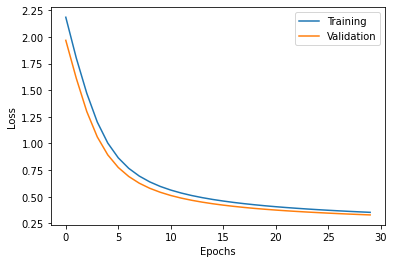

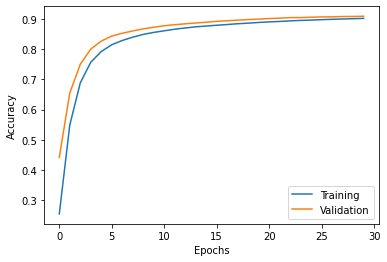

In [9]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

# Hálózat vizsgálata

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [13]:
print('Bemenet: ', model.input)

Bemenet:  Tensor("dense_input:0", shape=(None, 784), dtype=float32)


In [14]:
print('Rétegek:\n')
for layer in model.layers:
    print("Réteg neve: ", layer.name, ', tanítható: ', layer.trainable)
    print(layer.get_config(),'\n')

Rétegek:

Réteg neve:  dense , tanítható:  True
{'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} 

Réteg neve:  dense_1 , tanítható:  True
{'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} 

Réteg neve:  dense_2 , tanítható:  True
{'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 

In [15]:
print('Kimenet: ', model.output)

Kimenet:  Tensor("dense_2/Softmax:0", shape=(None, 10), dtype=float32)


# Adatok és aktivációk vizsgálata TensorBoard projectorban


In [19]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

# a modell bemenetének megadása
inp = model.input              
# a modell összes kimenetének a listázása                             
outputs = [layer.output for layer in model.layers]
print(outputs)

[<tf.Tensor 'dense/Relu:0' shape=(None, 256) dtype=float32>, <tf.Tensor 'dense_1/Relu:0' shape=(None, 256) dtype=float32>, <tf.Tensor 'dense_2/Softmax:0' shape=(None, 10) dtype=float32>]


Létrehozunk két almodellt, melyek kimenete az adott rétegek kimenete:

In [20]:
submodel_1 = Model(inp, outputs[0])
submodel_2 = Model(inp, outputs[1])

Ezt követően a teszt adatbázis 500 mintájával csinálunk egy-egy predikciót és külön tensor-okba mentünk el:

In [21]:
X_test500 = X_test[:500]
Y_test500 = Y_test[:500]

In [22]:
pred_1 = submodel_1.predict(X_test500)
pred_2 = submodel_2.predict(X_test500)

Ezt követően pedig a nyers adatokat és a réteg aktivációkat kiírjuk a TensorBoard Projektor számára. Ehhez a TensorBoardX csomagot fogjuk használni, amit telepíteni kell:

In [24]:
!pip install tensorboardX

     |████████████████████████████████| 317kB 4.4MB/s 


In [27]:
logdir = 'logs/'
from tensorboardX import SummaryWriter

with SummaryWriter(logdir+'/projector/raw_data') as w:
  w.add_embedding(X_test500, metadata=np.argmax(Y_test500,1), label_img=X_test500.reshape(500,1,28,28), global_step=0)

with SummaryWriter(logdir+'/projector/submodel_1') as w:
  w.add_embedding(pred_1, metadata=np.argmax(Y_test500,1), label_img=X_test500.reshape(500,1,28,28), global_step=0)

with SummaryWriter(logdir+'/projector/submodel_2') as w:
  w.add_embedding(pred_2, metadata=np.argmax(Y_test500,1), label_img=X_test500.reshape(500,1,28,28), global_step=0)


Végül pedig vizsgáljuk meg TensorBoard-ban a beágyazásokat. Ha esetleg a Projector menüpont nem jelenik meg, akkor az inactive menük közül válaszd ki:

In [29]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs